# Classifying Malaria Cell Images using Keras + Tensorflow

This example has been adapted from: https://towardsdatascience.com/deep-learning-to-identify-malaria-cells-using-cnn-on-kaggle-b9a987f55ea5

## Importing required libraries

We first begin by importing the python libraries that we require. For this tutorial, we would be using Keras over Tensorflow.


In [5]:
import cv2
import os
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

np.random.seed(1000)
%matplotlib inline

Using TensorFlow backend.
/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/miniconda3/envs/tensorfl

In [7]:
DATA_DIR = '/home/usr/data/cell_images/'
SIZE = 64
dataset = []
label = []

parasitized_images = os.listdir(DATA_DIR + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Parasitized/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [8]:
uninfected_images = os.listdir(DATA_DIR + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Uninfected/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

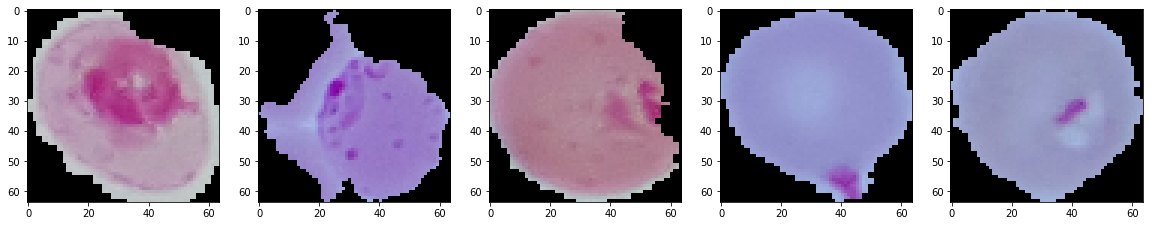

In [9]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(parasitized_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[image_index])

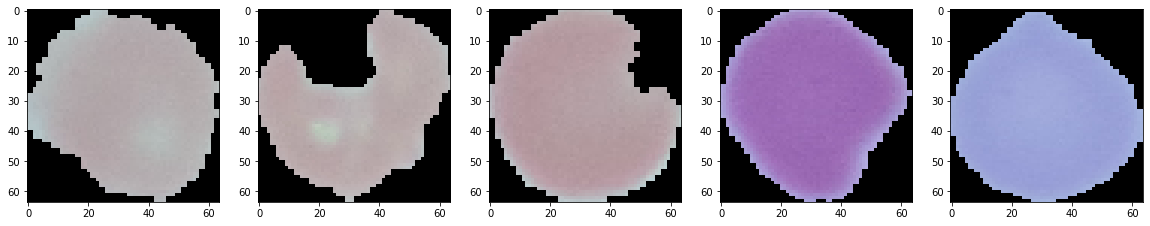

In [10]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(uninfected_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[len(parasitized_images) + image_index])

In [12]:
classifier = None
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(activation = 'relu', units=512))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'relu', units=256))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'sigmoid', units=2))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(classifier.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 32)       

In [14]:
X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

In [ ]:
history = classifier.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 2, 
                         epochs = 50, 
                         validation_split = 0.1,
                         shuffle = False)

Instructions for updating:
Use tf.cast instead.
Train on 19841 samples, validate on 2205 samples
Epoch 1/50
 - 130s - loss: 0.4733 - accuracy: 0.7732 - val_loss: 0.7947 - val_accuracy: 0.7605
Epoch 2/50
 - 129s - loss: 0.2341 - accuracy: 0.9103 - val_loss: 0.2006 - val_accuracy: 0.9279
Epoch 3/50
 - 137s - loss: 0.1884 - accuracy: 0.9278 - val_loss: 0.1694 - val_accuracy: 0.9374
Epoch 4/50
 - 144s - loss: 0.1624 - accuracy: 0.9384 - val_loss: 0.1737 - val_accuracy: 0.9361
Epoch 5/50
 - 147s - loss: 0.1378 - accuracy: 0.9470 - val_loss: 0.1605 - val_accuracy: 0.9420
Epoch 6/50
 - 135s - loss: 0.1183 - accuracy: 0.9538 - val_loss: 0.1640 - val_accuracy: 0.9474
Epoch 7/50
 - 141s - loss: 0.1106 - accuracy: 0.9573 - val_loss: 0.1549 - val_accuracy: 0.9492
Epoch 8/50
 - 143s - loss: 0.0941 - accuracy: 0.9642 - val_loss: 0.1443 - val_accuracy: 0.9587
Epoch 9/50
 - 150s - loss: 0.0803 - accuracy: 0.9674 - val_loss: 0.1892 - val_accuracy: 0.9488
Epoch 10/50
 - 149s - loss: 0.0770 - accuracy: 0

In [ ]:
print("Test_Accuracy: {:.2f}%".format(classifier.evaluate(np.array(X_test), np.array(y_test))[1]*100))